In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('Crop_recommendation.csv')

In [3]:
print(data.head())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [4]:
print(data.columns)

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [6]:

y_pred = [10, 20, 30, 40, 50]  

price_per_unit = 10  
seed_cost = 200  
pesticide_cost = 100 
labor_cost = 300  
other_costs = 50 

predicted_yield = sum(y_pred)
revenue = predicted_yield * price_per_unit
total_costs = seed_cost + pesticide_cost + labor_cost + other_costs

profit = revenue - total_costs
roi = (profit / total_costs) * 100

print(f'Predicted Yield: {predicted_yield:.2f}')
print(f'Revenue: ${revenue:.2f}')
print(f'Total Costs: ${total_costs:.2f}')
print(f'Profit: ${profit:.2f}')
print(f'Return on Investment (ROI): {roi:.2f}%')


Predicted Yield: 150.00
Revenue: $1500.00
Total Costs: $650.00
Profit: $850.00
Return on Investment (ROI): 130.77%


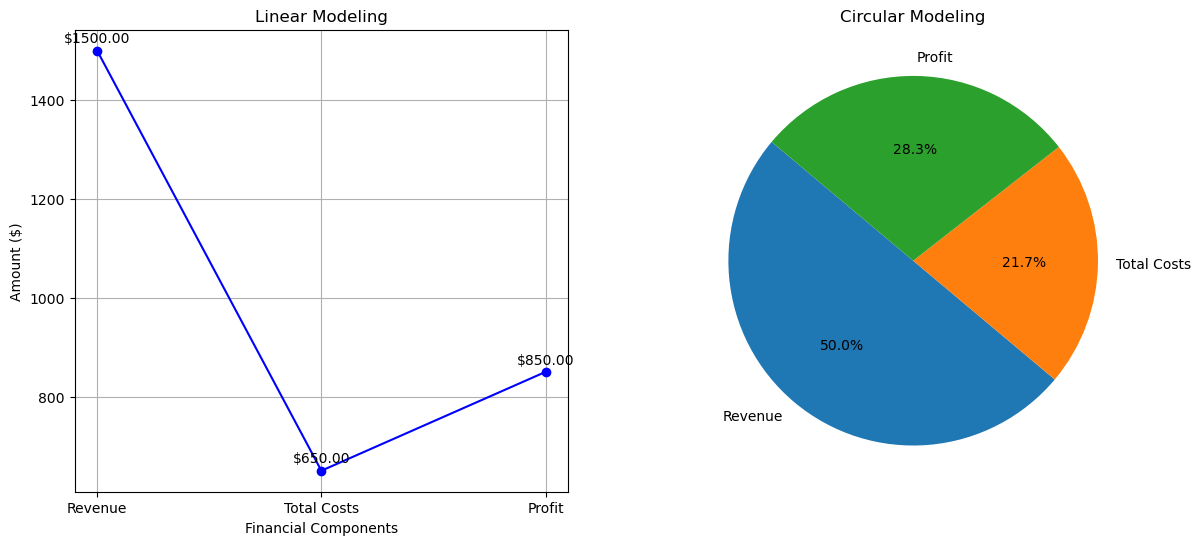

In [7]:
import matplotlib.pyplot as plt


components = ['Revenue', 'Total Costs', 'Profit']
values = [revenue, total_costs, profit]

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(components, values, marker='o', linestyle='-', color='b')
plt.xlabel('Financial Components')
plt.ylabel('Amount ($)')
plt.title('Linear Modeling')
plt.grid(True)


for i, v in enumerate(values):
    plt.text(i, v + 10, f"${v:.2f}", ha='center', va='bottom')
plt.subplot(1, 2, 2)
plt.pie(values, labels=components, autopct='%1.1f%%', startangle=140)
plt.title('Circular Modeling')

plt.show()


In [8]:

scenarios = {
    'Base Scenario': {'yield_change': 0, 'price_per_unit_change': 0},
    'Optimistic Scenario': {'yield_change': 0.1, 'price_per_unit_change': 0.1},
    'Pessimistic Scenario': {'yield_change': -0.1, 'price_per_unit_change': -0.1}
}

def calculate_scenario(scenario_params):
    # Adjust parameters based on the scenario
    yield_change = scenario_params['yield_change']
    price_per_unit_change = scenario_params['price_per_unit_change']

    adjusted_predicted_yield = predicted_yield * (1 + yield_change)


    adjusted_revenue = adjusted_predicted_yield * (price_per_unit * (1 + price_per_unit_change))
    adjusted_total_costs = total_costs 
    adjusted_profit = adjusted_revenue - adjusted_total_costs
    adjusted_roi = (adjusted_profit / adjusted_total_costs) * 100

    return adjusted_revenue, adjusted_total_costs, adjusted_profit, adjusted_roi

scenario_results = {}
for scenario, params in scenarios.items():
    adjusted_revenue, adjusted_total_costs, adjusted_profit, adjusted_roi = calculate_scenario(params)
    scenario_results[scenario] = {
        'Adjusted Revenue': adjusted_revenue,
        'Adjusted Total Costs': adjusted_total_costs,
        'Adjusted Profit': adjusted_profit,
        'Adjusted ROI': adjusted_roi
    }

for scenario, results in scenario_results.items():
    print(f'{scenario}:')
    for component, value in results.items():
        print(f'  {component}: ${value:.2f}')
    print()


Base Scenario:
  Adjusted Revenue: $1500.00
  Adjusted Total Costs: $650.00
  Adjusted Profit: $850.00
  Adjusted ROI: $130.77

Optimistic Scenario:
  Adjusted Revenue: $1815.00
  Adjusted Total Costs: $650.00
  Adjusted Profit: $1165.00
  Adjusted ROI: $179.23

Pessimistic Scenario:
  Adjusted Revenue: $1215.00
  Adjusted Total Costs: $650.00
  Adjusted Profit: $565.00
  Adjusted ROI: $86.92

